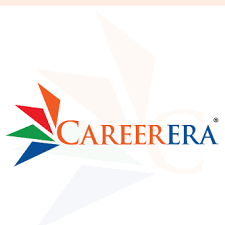

# <span style="color:blue"> ASSIGNMENT QUESTIONS (Clustering)</span>

#### Question 1: Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.
Link to download data: https://docs.google.com/spreadsheets/d/1Svd3Dd4LY24CRA5YgmvCyAw2PPOOR7SD/edit?usp=sharing&ouid=105576860853042492908&rtpof=true&sd=true

In [36]:
#write your code here............
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Retrieve the record
Airline_df=pd.read_csv('EastWestAirlines- data.csv')
Airline_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [38]:
# Dropping the column ID
Airline_df=Airline_df.drop(['ID#'],axis=1)
Airline_df.sample(15)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
2817,7108,0,1,1,1,5598,8,2500,5,2026,1
342,38718,0,1,1,1,0,0,0,0,7314,0
65,53914,0,3,1,1,33767,45,5550,29,6826,1
1656,642756,0,4,1,1,37889,15,1000,2,4841,0
1560,63437,0,2,1,1,7160,15,0,0,4595,0
2940,55381,0,1,1,1,0,0,0,0,3600,0
2465,66524,0,4,1,1,34682,23,0,0,3188,0
411,68963,0,4,1,1,37723,15,0,0,8296,0
175,451673,0,4,1,1,43533,19,900,4,7575,1
887,91736,0,4,1,1,26724,14,0,0,5994,0


In [39]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Airline_df_norm = standard_scaler.fit_transform(Airline_df)

# K-Means Clustering

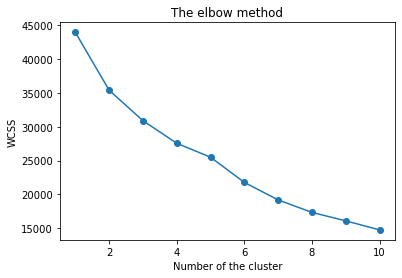

In [40]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 
# finding the optimum number of clusters for K-means clarification
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(Airline_df_norm)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line grapg allowing us to observe the elbow
plt.plot(range(1,11),wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of the cluster')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans=KMeans(n_clusters=3,init='random',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(Airline_df_norm)
y_kmeans

array([2, 2, 2, ..., 0, 2, 2])

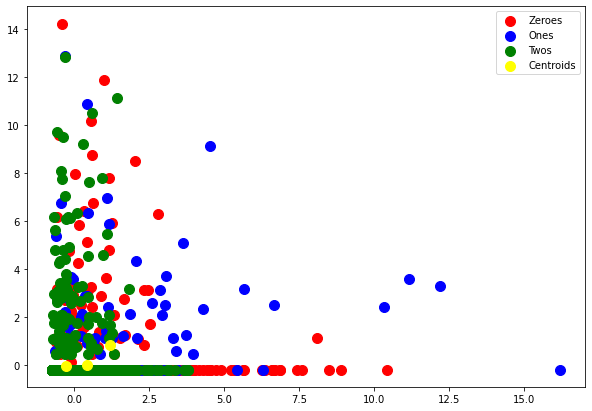

In [42]:
# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(Airline_df_norm[y_kmeans==0,0],Airline_df_norm[y_kmeans==0,1],s=100,c='red',label='Zeroes')
plt.scatter(Airline_df_norm[y_kmeans==1,0],Airline_df_norm[y_kmeans==1,1],s=100,c='blue',label='Ones')
plt.scatter(Airline_df_norm[y_kmeans==2,0],Airline_df_norm[y_kmeans==2,1],s=100,c='green',label='Twos')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')

plt.legend()

# Hierachical Clustering

In [43]:
Airline_df['Cluster ID'] = y_kmeans
# Airline_df.sample(5)
X = Airline_df.iloc[:,0:10].values
Y = Airline_df.iloc[:,11].values

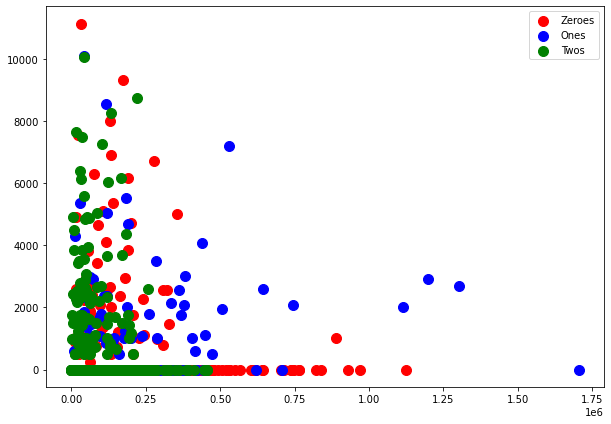

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=100, c='red', label='Zeroes')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=100, c='blue', label='Ones')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=100, c='green', label='Twos')
plt.legend()
plt.show()

Text(0, 0.5, 'Euclidean distance')

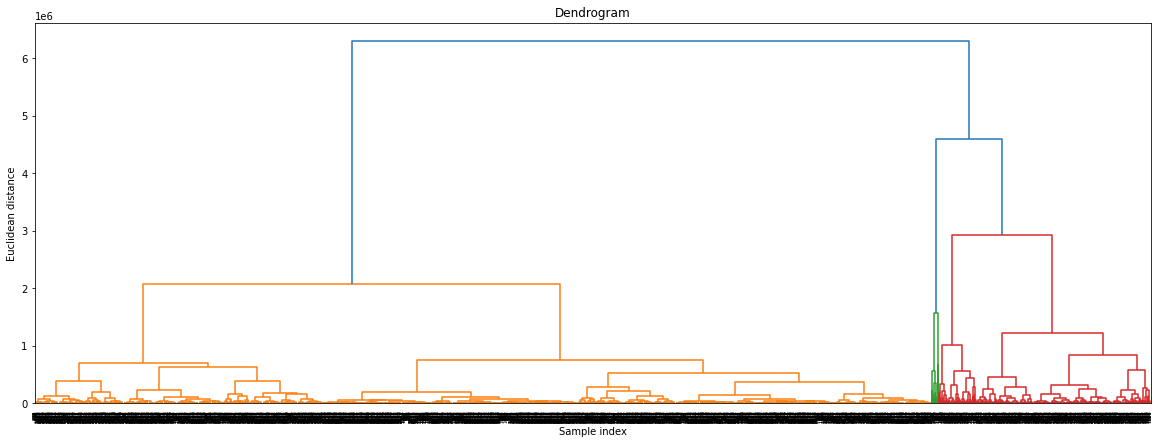

In [49]:
#  Creating dendrogram
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(X)
labels = cluster.labels_
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
Airline_df['Cluster ID'].value_counts()

2    2588
0    1247
1     164
Name: Cluster ID, dtype: int64

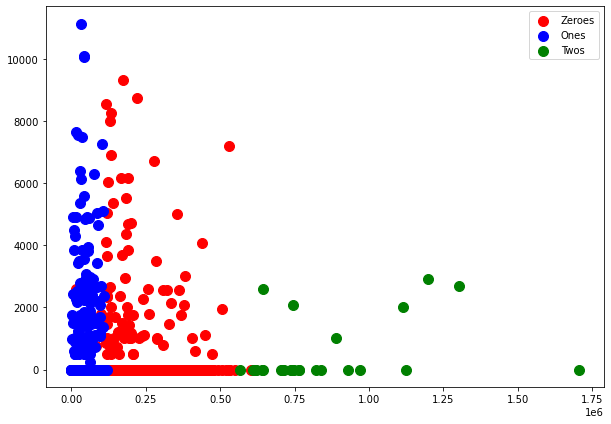

In [47]:
plt.figure(figsize=(10, 7))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Zeroes')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Ones')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Twos')
plt.legend()
plt.show()

#### Question 2: Perform Clustering(Hierarchical, Kmeans) for the crime data and identify the number of clusters formed and draw inferences.

Link to download data: https://drive.google.com/file/d/1UFrR4sKGSBRsqFNEHVU7g1KVcnbt7VJb/view?usp=sharing

In [52]:
#write your code here............
# Retrieve the record
Crime_df=pd.read_csv('crime_data.csv')
Crime_df.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [55]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Crime_df=Crime_df.drop(['Unnamed: 0'],axis=1)
Crime_df_norm = standard_scaler.fit_transform(Crime_df)

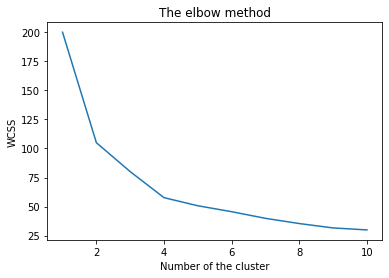

In [57]:
# finding the optimum number of clusters for K-means clarification
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(Crime_df_norm)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line grapg allowing us to observe the elbow
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of the cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# The scree plot levels off at k=4 and it is going to be used to determine the clusters

In [59]:
kmeans_D=KMeans(n_clusters=4,init='random',max_iter=300,n_init=10,random_state=0)
yd_kmeans=kmeans_D.fit_predict(Crime_df_norm)
yd_kmeans

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       3, 2, 0, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0])

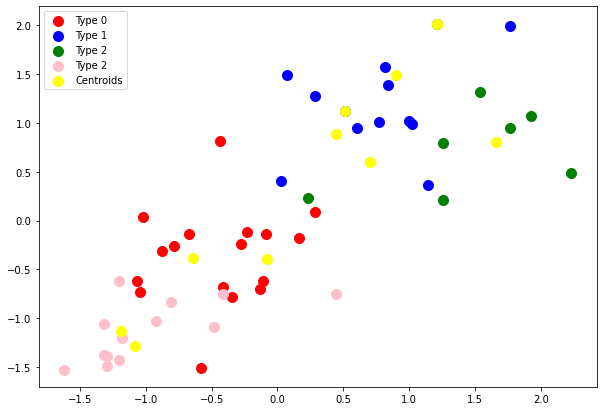

In [61]:
# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(Crime_df_norm[yd_kmeans==0,0],Crime_df_norm[yd_kmeans==0,1],s=100,c='red',label='Type 0')
plt.scatter(Crime_df_norm[yd_kmeans==1,0],Crime_df_norm[yd_kmeans==1,1],s=100,c='blue',label='Type 1')
plt.scatter(Crime_df_norm[yd_kmeans==2,0],Crime_df_norm[yd_kmeans==2,1],s=100,c='green',label='Type 2')
plt.scatter(Crime_df_norm[yd_kmeans==3,0],Crime_df_norm[yd_kmeans==3,1],s=100,c='pink',label='Type 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')

plt.legend()

In [65]:
Crime_df['Cluster ID'] = yd_kmeans
Crime_df.sample(5)

,Murder,Assault,UrbanPop,Rape,Cluster ID
7,5.9,238,72,15.8,0
49,6.8,161,60,15.6,0
39,14.4,279,48,22.5,2
15,6.0,115,66,18.0,0
5,7.9,204,78,38.7,1


# Hierachical Clustering

In [71]:
X = Crime_df.iloc[:,0:3].values
Y = Crime_df.iloc[:,4].values

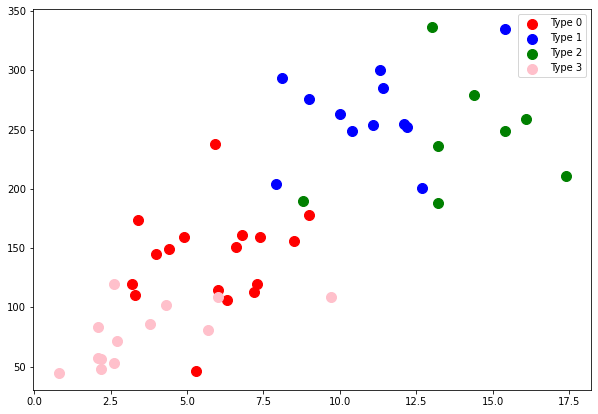

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=100, c='red', label='Type 0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=100, c='blue', label='Type 1')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=100, c='green', label='Type 2')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=100, c='pink', label='Type 3')
plt.legend()
plt.show()

Text(0, 0.5, 'Euclidean distance')

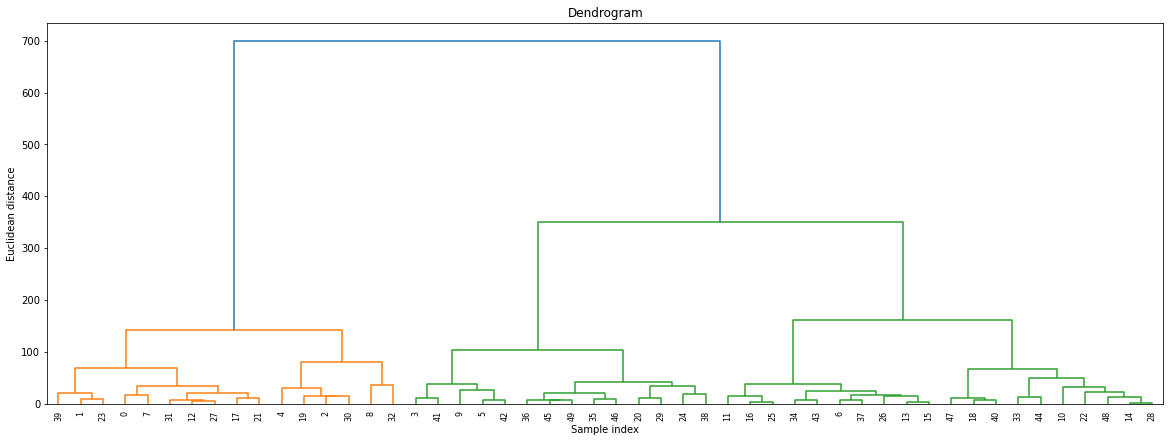

In [88]:
#  Creating dendrogram
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [89]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=4, affinity='euclidean', linkage='ward')

cluster.fit(X)
labels = cluster.labels_
labels

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

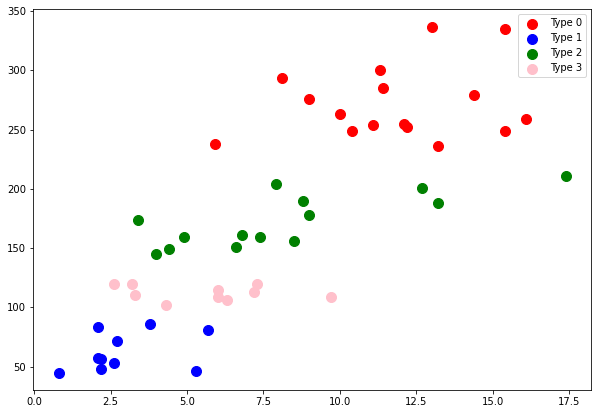

In [84]:
plt.figure(figsize=(10, 7))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Type 0')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Type 2')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'pink', label = 'Type 3')
plt.legend()
plt.show()